In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First we check the structure and organisatio of each data
data_files = [file for file in os.listdir("./Fitabase_Data_4.12.16-5.12.16") if file.endswith(".csv")]
data_files.sort()
#print(data_files)
for f in data_files: 
    df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16",f)) 
    num_users = len(df["Id"].unique())
    print("*"*60)
    print(f"\n{f}\n{df.dtypes} \n")
    print(f"\n{f}\n{df.head()} \n")
    print(f"The shape of the data is {df.shape}")
    print(f"The nuber of users is {num_users}")
    print("*"*60 + "\n")

# flush out unwanted variables
del df, num_users

************************************************************

dailyActivity_merged.csv
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object 


dailyActivity_merged.csv
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9

In [3]:
# We can see that the daily infomations are integrated in the file named dailyActivity_merged.csv
# Another thing we can conclude from the the code is that not all the user used all the service
# Based on the result we know there are 
# 33 users track their daily activity
# 24 users track their sleep
# 14 users track their H.R.
# 8 users track their weights

dailyActivity_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "dailyActivity_merged.csv")) 
sleepDay_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "sleepDay_merged.csv"))
heartrate_seconds_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "heartrate_seconds_merged.csv"))
weightLogInfo_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "weightLogInfo_merged.csv"))

Activity_set = set(dailyActivity_merged_df["Id"].unique())
sleepDay_set = set(sleepDay_merged_df["Id"].unique())
heartrate_set = set(heartrate_seconds_merged_df["Id"].unique())
weight_set = set(weightLogInfo_merged_df["Id"].unique())


In [4]:
# To further explore we know

# there are overall 33 users
print(len(Activity_set.union(sleepDay_set, heartrate_set, weight_set)))


# 24 (72%) users track both activity and sleep 
print(len(Activity_set.intersection(sleepDay_set)))

# 14 users track both activity and H.R. 
print(len(Activity_set.intersection(heartrate_set)))

# 12 users track activity, sleep and H.R. 
print(len(Activity_set.intersection(sleepDay_set,heartrate_set)))

# 3 users track activity, sleep, H.R. and weight
print(len(Activity_set.intersection(sleepDay_set,heartrate_set, weight_set)))

33
24
14
12
3


In [5]:
# Since there are 33 users who track daily activity 
# and 24 users track both daily activity and daily sleep 
# therefore we can merge these two data together
# Let's convert the daily activilty and sleep data into right format and merge them together
dailyActivity_merged_df["Date"] = pd.to_datetime(dailyActivity_merged_df["ActivityDate"])
sleepDay_merged_df["Date"] = pd.to_datetime(sleepDay_merged_df["SleepDay"])
daily_data = dailyActivity_merged_df.merge(right=sleepDay_merged_df, how="left", left_on=["Id", "Date"], right_on=["Id", "Date"])
daily_data["week_day"] = daily_data["Date"].dt.dayofweek
print(daily_data.dtypes) 
print(daily_data.shape) 

Id                                   int64
ActivityDate                        object
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Date                        datetime64[ns]
SleepDay                            object
TotalSleepRecords                  float64
TotalMinutesAsleep                 float64
TotalTimeInBed                     float64
week_day                             int64
dtype: object
(943, 21)


In [6]:
# Clean the data, since there are no string inside we drop the N/A and the duplicates in our data 

daily_data = daily_data.drop(["ActivityDate", "SleepDay"], axis=1)
daily_data = daily_data.drop_duplicates()
print(daily_data.dtypes) 
print(daily_data.shape)


Id                                   int64
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Date                        datetime64[ns]
TotalSleepRecords                  float64
TotalMinutesAsleep                 float64
TotalTimeInBed                     float64
week_day                             int64
dtype: object
(940, 19)


                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

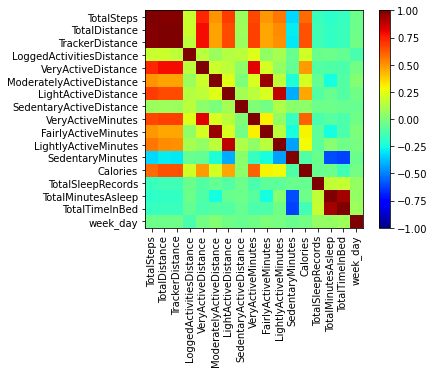

In [7]:
# Now we can see some basic data summary and the correlation between data
print("{} \n {}".format(daily_data.describe(), "-"*60))

temp_daily_data = daily_data.drop(["Date", "Id"], axis = 1)
corr_map = temp_daily_data.corr()
corr_labels = temp_daily_data.columns.to_list()
#corr_labels = corr_labels.remove('Date')
plt.imshow(corr_map, cmap = "jet", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(ticks= range(len(corr_labels)),labels= corr_labels, rotation = 90)
plt.yticks(ticks= range(len(corr_labels)),labels= corr_labels)
plt.show()

Text(0, 0.5, 'Calories consumed')

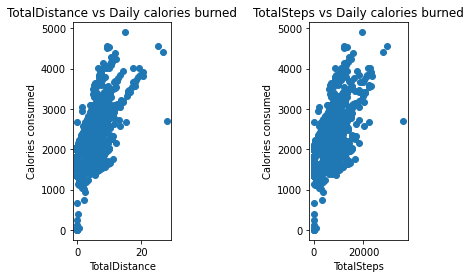

In [8]:
# It seems that there's a high positive correlation between TotalSteps, Calories
plt.subplot(1,3,1)
plt.scatter(x = daily_data["TotalDistance"], y = daily_data["Calories"])
plt.title("TotalDistance vs Daily calories burned")
plt.xlabel("TotalDistance")
plt.ylabel("Calories consumed")

plt.subplot(1,3,3)
plt.scatter(x = daily_data["TotalSteps"], y = daily_data["Calories"])
plt.title("TotalSteps vs Daily calories burned")
plt.xlabel("TotalSteps")
plt.ylabel("Calories consumed")


In [9]:
# Based on the data we know some of the users are not very active, so does the calories consumed different across the activity?

Text(0.5, 1.0, 'TotalSteps vs Daily sleep time burned')

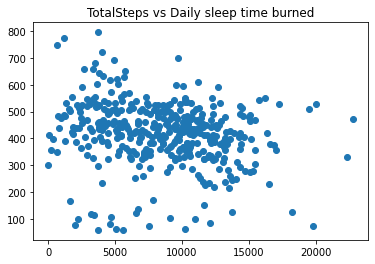

In [10]:
# But does this impact their sleep patterns?
plt.scatter(x = daily_data["TotalSteps"], y = daily_data["TotalMinutesAsleep"])
plt.title("TotalSteps vs Daily sleep time burned")



<AxesSubplot:title={'center':'TotalMinutesAsleep'}, xlabel='[week_day]'>

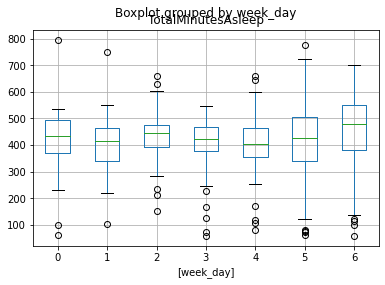

In [11]:
# The sleep patterns seems not affect by the steps our users took
# So that's see how the week day users' sleep cycle and activity
# The week day starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6
# The sleep patterns across the week day are not that different
daily_data.boxplot(column=['TotalMinutesAsleep'], by=['week_day'])




<AxesSubplot:title={'center':'TotalSteps'}, xlabel='[week_day]'>

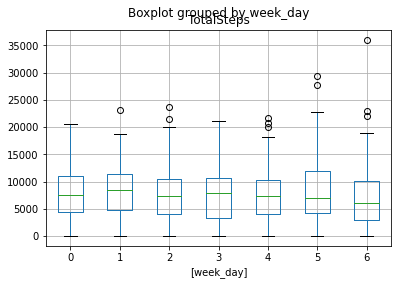

In [12]:
# and the activity also showed slightly difference in different week days 
daily_data.boxplot(column=['TotalSteps'], by=['week_day'])


Text(0.5, 1.0, 'VeryActiveMinutes vs Total sleep hours')

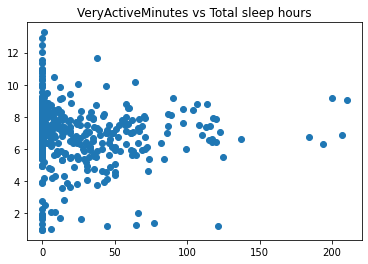

In [15]:
plt.scatter(x = daily_data["VeryActiveMinutes"], y = daily_data["TotalMinutesAsleep"]/60)
plt.title("VeryActiveMinutes vs Total sleep hours")

In [31]:
# But does this impact their sleep patterns?
daily_data.loc[pd.isna(daily_data["TotalMinutesAsleep"]/60) == True , "sleepPatterns"] = "No Records"
daily_data.loc[daily_data["TotalMinutesAsleep"]/60 < 6, "sleepPatterns"] = "< 6 hours"
daily_data.loc[(daily_data["TotalMinutesAsleep"]/60 >= 6) & (daily_data["TotalMinutesAsleep"]/60 <=9), "sleepPatterns"] = "6-9 hours"
daily_data.loc[daily_data["TotalMinutesAsleep"]/60 >9 , "sleepPatterns"] = "> 9 hours"



<AxesSubplot:xlabel='sleepPatterns'>

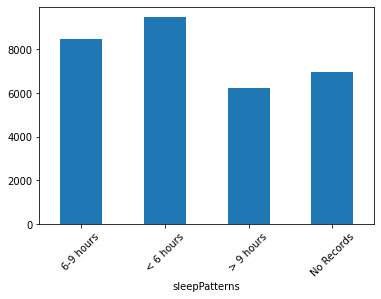

In [27]:
daily_data.groupby("sleepPatterns").mean()["TotalSteps"].plot.bar(rot = 45)

<AxesSubplot:xlabel='sleepPatterns'>

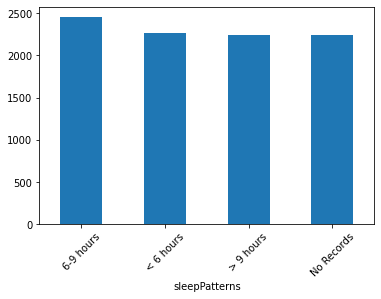

In [29]:
daily_data.groupby("sleepPatterns").mean()["Calories"].plot.bar(rot = 45)

Text(0.5, 1.0, 'VeryActiveMinutes vs Calories')

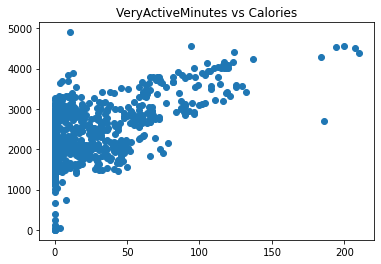

In [30]:
plt.scatter(x = daily_data["VeryActiveMinutes"], y = daily_data["Calories"])
plt.title("VeryActiveMinutes vs Calories")